
# Delete stations from metadata

This script is used to cleanup stations, which we do not want to include furthermore.  

Reasons:
- No location (`NaN` / `inf`)


In [1]:
import numpy as np
import pyproj

from camelsp import get_metadata

In [2]:
# Get metadata
metadata = get_metadata()
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700000,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,0.969240,0.976895
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,0.709148,0.685209
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700000,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,0.958767,0.962387
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,0.502141,0.553354
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,0.940139,0.977699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,DE912850,4887101,./DE9/DE912850/DE912850_data.csv,DE9,Niedersachsen,Koldingen,NaN,NaN,4958.909671,4.307642e+06,3.240659e+06,9.804298,52.275377,0.0,12480.0,NaN,NaN
2866,DE912860,4948130,./DE9/DE912860/DE912860_data.csv,DE9,Niedersachsen,Tietjens Hütte,NaN,NaN,462.359364,4.242145e+06,3.344549e+06,8.819951,53.203393,0.0,24138.0,NaN,NaN
2867,DE912880,4994109,./DE9/DE912880/DE912880_data.csv,DE9,Niedersachsen,Weddewarden,NaN,NaN,128.718582,4.223978e+06,3.388719e+06,8.534632,53.597259,0.0,5479.0,NaN,NaN
2868,DE912920,9286164,./DE9/DE912920/DE912920_data.csv,DE9,Niedersachsen,Laar,NaN,NaN,1749.573210,4.100147e+06,3.283012e+06,6.738424,52.611652,0.0,19450.0,NaN,NaN


### Delete stations where we have no location

In [36]:
# filter metadata where lon or lar is nan
metadata = metadata[~(metadata['lon'].isna() | metadata['lat'].isna())]
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700000,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,0.969240,0.976895
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,0.709148,0.685209
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700000,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,0.958767,0.962387
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,0.502141,0.553354
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,0.940139,0.977699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,DE912890,5934145,./DE9/DE912890/DE912890_data.csv,DE9,Niedersachsen,Jeetzel UW,NaN,NaN,NaN,inf,inf,inf,inf,0.0,18689.0,NaN,NaN
2902,DE912900,5985101,./DE9/DE912900/DE912900_data.csv,DE9,Niedersachsen,Bremervörde,NaN,NaN,NaN,inf,inf,inf,inf,0.0,9923.0,NaN,NaN
2903,DE912910,5986107,./DE9/DE912910/DE912910_data.csv,DE9,Niedersachsen,Hollen,NaN,NaN,NaN,inf,inf,inf,inf,0.0,12845.0,NaN,NaN
2904,DE912920,9286164,./DE9/DE912920/DE912920_data.csv,DE9,Niedersachsen,Laar,NaN,NaN,1749.573210,4.100147e+06,3.283012e+06,6.738424,52.611652,0.0,19450.0,NaN,NaN


In [37]:
# filter metadata where lon or lar is inf
metadata = metadata[~(metadata['lon'].isin([np.inf, -np.inf]) | metadata['lat'].isin([np.inf, -np.inf]))]
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700000,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,0.969240,0.976895
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,0.709148,0.685209
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700000,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,0.958767,0.962387
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,0.502141,0.553354
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,0.940139,0.977699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,DE912850,4887101,./DE9/DE912850/DE912850_data.csv,DE9,Niedersachsen,Koldingen,NaN,NaN,4958.909671,4.307642e+06,3.240659e+06,9.804298,52.275377,0.0,12480.0,NaN,NaN
2898,DE912860,4948130,./DE9/DE912860/DE912860_data.csv,DE9,Niedersachsen,Tietjens Hütte,NaN,NaN,462.359364,4.242145e+06,3.344549e+06,8.819951,53.203393,0.0,24138.0,NaN,NaN
2900,DE912880,4994109,./DE9/DE912880/DE912880_data.csv,DE9,Niedersachsen,Weddewarden,NaN,NaN,128.718582,4.223978e+06,3.388719e+06,8.534632,53.597259,0.0,5479.0,NaN,NaN
2904,DE912920,9286164,./DE9/DE912920/DE912920_data.csv,DE9,Niedersachsen,Laar,NaN,NaN,1749.573210,4.100147e+06,3.283012e+06,6.738424,52.611652,0.0,19450.0,NaN,NaN


### Plot all stations to see if any stations are "off" / outside of Germany

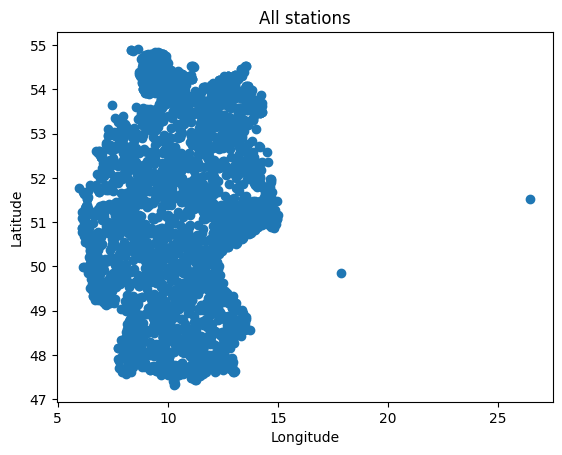

In [38]:
# plot all stations on map
import matplotlib.pyplot as plt

plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()


In [39]:
# get the two station with maximum longitude
metadata[metadata['lon'] >= metadata['lon'].sort_values(ascending=False).iloc[1]]

# get the second largest longitude
# metadata[metadata['lon'] == metadata['lon'].sort_values(ascending=False).iloc[1]]


,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
966,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,4.886258e+06,3.000322e+06,17.874741,49.842265,2919.0,2919.0,0.882173,0.988777
1477,DE812120,59607.3,./DE8/DE812120/DE812120_data.csv,DE8,Mecklenburg Vorpommern,Plau,Gerinne,60.060,1230.00,5.453414e+06,3.284893e+06,26.475180,51.516893,4017.0,4017.0,0.958627,0.979679


Two stations are located outside of Germany, which is obviously an error.  

Correct that error by hand!


Starting with station `DEB10440` in Rheinland-Pfalz, I found the location on this [website](https://www.aw-wiki.de/index.php/Pegel_Adenauer_Bach_(Niederadenau)), when right-clicking on the icon the displayed map.  
- lon: 6.93165
- lat: 50.435469

I just overwrite X, Y, lon and lat in the metadata with this values.

In [40]:
# Define the source and target coordinate systems
source_crs = "EPSG:4326"  # WGS84
target_crs = "EPSG:31466"  # DHDN / 3-degree Gauss-Kruger zone 2

# Create a transformer object
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Define the original coordinates
lon = 6.93165
lat = 50.435469

# Convert the coordinates
x, y = transformer.transform(lon, lat)

print(f"Converted coordinates: {x}, {y}")

Converted coordinates: 2566233.4287766777, 5589261.994987712


In [41]:
# overwrite the lon and lat where camels_id==DEB10440 with the transformed coordinates
metadata.loc[metadata['camels_id'] == 'DEB10440', ['lon', 'lat']] = lon, lat
metadata.loc[metadata['camels_id'] == 'DEB10440', ['x', 'y']] = x, y

metadata[metadata['camels_id'] == 'DEB10440']

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
966,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,2.566233e+06,5.589262e+06,6.93165,50.435469,2919.0,2919.0,0.882173,0.988777


Now we go for `DE812120` (Pegel Plau). For this particular gauge, I cannot find a definitive location. There are some Pegel Plau in the metadata.  
The one with the wrong location is with Gewässer 'Gerinne', which sounds not that important.  
Data coverage is also only 9 years with some weird jumps.  

--> Decided to delete this Pegel entirely, as it is not clear what to do with it.

In [50]:
import pandas as pd
from camelsp import Station

meta = pd.read_csv('../output_data/raw_metadata/DE8_raw_metadata.csv')
meta.iloc[210:213]

,pegelkennzahl,bezeichnung,gewaesser,rechtswert,hochwert,fg_einheit,gebietskennzahl,pnp,pnp_system,vorgaengerpegel,einzugsgebiet,gewaesserkennzahl,start_jahr,end_jahr
210,59607.0,Plau,Plauer See,318153,5926577,1,5925990000,60.00,-,NaN,1200.0,5.920000e+09,1957.0,1977.0
211,59607.1,Plau OP,Müritz-Elde-Wstr.,318153,5926577,3,5927131000,60.16,DHHN92,NaN,1230.0,5.920000e+09,1957.0,2020.0
212,59607.3,Plau,Gerinne,1295000,5770000,1,0,60.06,-,NaN,1230.0,NaN,1978.0,1987.0


<Axes: xlabel='date'>

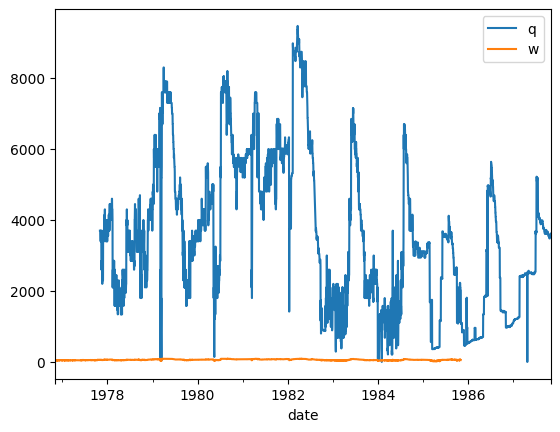

In [49]:
Station('DE812120').get_data().plot()

In [51]:
# delete station from metadata
metadata = metadata[metadata['camels_id'] != 'DE812120']
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_w_pearson,q_w_spearman
0,DEG10000,573000,./DEG/DEG10000/DEG10000_data.csv,DEG,Thüringen,Ammern,Unstrut,210.243,182.700000,4.352221e+06,3.124617e+06,10.446993,51.231727,29646.0,29646.0,0.969240,0.976895
1,DEG10010,447000,./DEG/DEG10010/DEG10010_data.csv,DEG,Thüringen,Arenshausen,Leine,196.288,275.000000,4.318941e+06,3.140875e+06,9.970428,51.378709,22707.0,22707.0,0.709148,0.685209
2,DEG10020,574200,./DEG/DEG10020/DEG10020_data.csv,DEG,Thüringen,Arnstadt,Gera,293.577,174.700000,4.386764e+06,3.077926e+06,10.933022,50.809106,35490.0,35490.0,0.958767,0.962387
3,DEG10030,576500,./DEG/DEG10030/DEG10030_data.csv,DEG,Thüringen,Berga,Weiße Elster,218.995,1383.000000,4.473276e+06,3.073272e+06,12.157989,50.750857,12845.0,12845.0,0.502141,0.553354
4,DEG10040,570210,./DEG/DEG10040/DEG10040_data.csv,DEG,Thüringen,Blankenstein-Rosenthal,Saale,410.517,1013.000000,4.442190e+06,3.033884e+06,11.704738,50.404273,21246.0,21246.0,0.940139,0.977699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,DE912850,4887101,./DE9/DE912850/DE912850_data.csv,DE9,Niedersachsen,Koldingen,NaN,NaN,4958.909671,4.307642e+06,3.240659e+06,9.804298,52.275377,0.0,12480.0,NaN,NaN
2898,DE912860,4948130,./DE9/DE912860/DE912860_data.csv,DE9,Niedersachsen,Tietjens Hütte,NaN,NaN,462.359364,4.242145e+06,3.344549e+06,8.819951,53.203393,0.0,24138.0,NaN,NaN
2900,DE912880,4994109,./DE9/DE912880/DE912880_data.csv,DE9,Niedersachsen,Weddewarden,NaN,NaN,128.718582,4.223978e+06,3.388719e+06,8.534632,53.597259,0.0,5479.0,NaN,NaN
2904,DE912920,9286164,./DE9/DE912920/DE912920_data.csv,DE9,Niedersachsen,Laar,NaN,NaN,1749.573210,4.100147e+06,3.283012e+06,6.738424,52.611652,0.0,19450.0,NaN,NaN


## Add any further cleanup here

In [52]:
#

## Save new metadata

In [53]:
# save metadata
metadata = metadata.reset_index(drop=True)
metadata.to_csv('../output_data/metadata/metadata.csv', index=False)

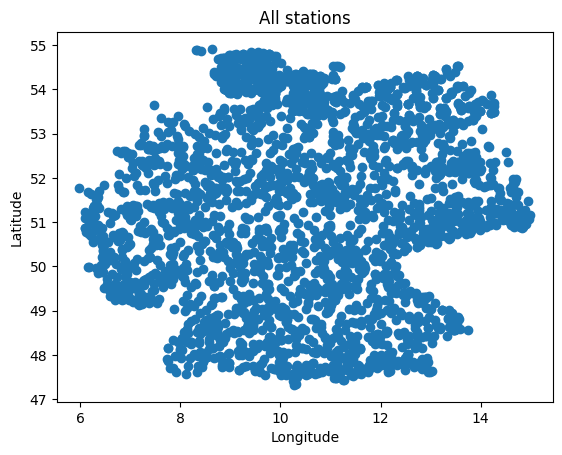

In [58]:
# plot all stations on map
import matplotlib.pyplot as plt
metadata = get_metadata()

plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()
